In [19]:
import pandas as pd

In [23]:
df_rotated = pd.read_csv("final_clusters_rotated.csv")
df_original = pd.read_csv("final_clusters.csv")

# Remove transitions with E <  285
df_rotated = df_rotated[df_rotated['E'] > 285]
df_original = df_original[df_original['E'] > 285]

display(df_rotated.head())
display(df_original.head())

,Unnamed: 0,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
7,7,285.841665,0.295977,0.010541,9.903784,0.939446,0.0,0.939446,6.096216,0.0,0.0,0.0,8.0,55.476041
8,8,286.533105,0.318640,0.029602,6.318152,-1.859643,0.0,-1.859643,13.681848,0.0,0.0,0.0,16.0,43.285958
9,9,287.138147,0.294076,0.011910,8.104607,-8.336687,0.0,-8.336687,11.895393,0.0,0.0,0.0,4.0,74.469652
10,10,287.741226,0.311825,0.030063,17.937997,-3.463479,0.0,-3.463479,14.062003,0.0,0.0,0.0,24.0,43.522161
11,11,288.755319,0.348800,0.009221,30.690288,-0.330012,0.0,-0.330012,49.309712,0.0,0.0,0.0,8.0,82.157432


,Unnamed: 0,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
3,3,285.381029,0.398315,0.054148,11.343777,-6.108456,0.0,-6.108456,28.656223,0.0,0.0,0.0,16.0,62.564066
4,4,286.167658,0.279759,0.028912,13.341122,2.445828,0.0,2.445828,6.658878,0.0,0.0,0.0,4.0,74.983097
5,5,286.873893,0.324903,0.020234,11.455863,2.487561,0.0,2.487561,12.544137,0.0,0.0,0.0,8.0,64.783286
6,6,287.502991,0.276702,0.006097,9.505447,0.662162,0.0,0.662162,14.494553,0.0,0.0,0.0,4.0,77.005407
7,7,288.272497,0.332288,0.022679,16.266588,0.422190,0.0,0.422190,15.733412,0.0,0.0,0.0,32.0,35.268138


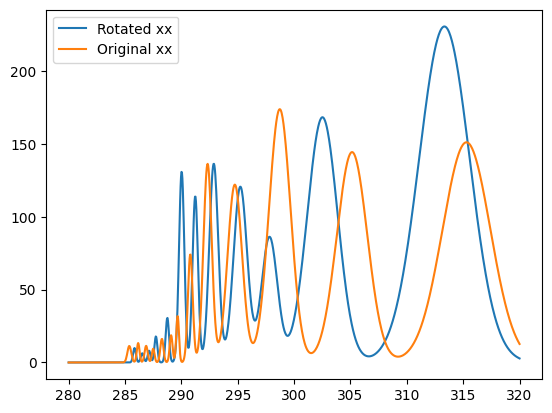

In [24]:
# Plot the sum of peaks with height based on the xx, and zz values. Compute the sum for each set
# Then plot them on the same plot. One plot for xx and one plot for zz
import numpy as np
import matplotlib.pyplot as plt

def sigma(width):
    return width / (2 * np.sqrt(2 * np.log(2)))
def peak(row, energy):
    # Returns a (3, 3, len(energy)) array, where each of the xx, yy, zz are spectral profiles
    profile_xx = row['xx'] * np.exp(-(energy - row['E'])**2 / (2 * sigma(row['width'])**2))
    profile_yy = row['yy'] * np.exp(-(energy - row['E'])**2 / (2 * sigma(row['width'])**2))
    profile_zz = row['zz'] * np.exp(-(energy - row['E'])**2 / (2 * sigma(row['width'])**2))
    result = np.zeros((3, 3, len(energy)))
    result[0, 0, :] = profile_xx
    result[1, 1, :] = profile_yy
    result[2, 2, :] = profile_zz
    return result

energy = np.linspace(280, 320, 1000)

peakset = []
peakset_rotated = []
for _, row in df_rotated.iterrows():
    peakset.append(peak(row, energy))

for _, row in df_original.iterrows():
    peakset_rotated.append(peak(row, energy))

# Plot the sum of the peaks
# To fix the shape mismatch, sum over the right axes to get a (1000,) array for plotting.
# For example, plot only the xx component (0,0) from the 3x3 matrix.
rotated_sum_xx = np.sum([pk[0,0,:] for pk in peakset], axis=0)
original_sum_xx = np.sum([pk[0,0,:] for pk in peakset_rotated], axis=0)
plt.plot(energy, rotated_sum_xx, label='Rotated xx')
plt.plot(energy, original_sum_xx, label='Original xx')
plt.legend()
plt.show()